<a href="https://colab.research.google.com/github/zevan07/DS-Unit-2-Applied-Modeling/blob/master/Log_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/caterpillar/caterpillar-tube-pricing.zip

--2019-07-22 21:57:52--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/caterpillar/caterpillar-tube-pricing.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 823789 (804K) [application/zip]
Saving to: ‘caterpillar-tube-pricing.zip’

caterpillar-tube-pr 100%[===================>] 804.48K  --.-KB/s    in 0.04s   

2019-07-22 21:57:52 (18.6 MB/s) - ‘caterpillar-tube-pricing.zip’ saved [823789/823789]



In [2]:
!ls *.zip

caterpillar-tube-pricing.zip


In [3]:
!unzip caterpillar-tube-pricing.zip

Archive:  caterpillar-tube-pricing.zip
  inflating: sample_submission.csv   
  inflating: data.zip                


In [4]:
!unzip data.zip

Archive:  data.zip
   creating: competition_data/
  inflating: competition_data/bill_of_materials.csv  
  inflating: competition_data/comp_adaptor.csv  
  inflating: competition_data/comp_boss.csv  
  inflating: competition_data/comp_elbow.csv  
  inflating: competition_data/comp_float.csv  
  inflating: competition_data/comp_hfl.csv  
  inflating: competition_data/comp_nut.csv  
  inflating: competition_data/comp_other.csv  
  inflating: competition_data/comp_sleeve.csv  
  inflating: competition_data/comp_straight.csv  
  inflating: competition_data/comp_tee.csv  
  inflating: competition_data/comp_threaded.csv  
  inflating: competition_data/components.csv  
  inflating: competition_data/specs.csv  
  inflating: competition_data/test_set.csv  
  inflating: competition_data/train_set.csv  
  inflating: competition_data/tube.csv  
  inflating: competition_data/tube_end_form.csv  
  inflating: competition_data/type_component.csv  
  inflating: competition_data/type_connection.csv  
  i

In [5]:
from glob import glob
import pandas as pd

for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    print(path, df.shape)

competition_data/type_end_form.csv (8, 2)
competition_data/comp_elbow.csv (178, 16)
competition_data/tube_end_form.csv (27, 2)
competition_data/type_connection.csv (14, 2)
competition_data/comp_adaptor.csv (25, 20)
competition_data/bill_of_materials.csv (21198, 17)
competition_data/comp_sleeve.csv (50, 10)
competition_data/comp_straight.csv (361, 12)
competition_data/comp_hfl.csv (6, 9)
competition_data/components.csv (2048, 3)
competition_data/comp_float.csv (16, 7)
competition_data/comp_threaded.csv (194, 32)
competition_data/test_set.csv (30235, 8)
competition_data/comp_nut.csv (65, 11)
competition_data/tube.csv (21198, 16)
competition_data/train_set.csv (30213, 8)
competition_data/specs.csv (21198, 11)
competition_data/comp_other.csv (1001, 3)
competition_data/type_component.csv (29, 2)
competition_data/comp_boss.csv (147, 15)
competition_data/comp_tee.csv (4, 14)


In [0]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [0]:
trainval = pd.read_csv('competition_data/train_set.csv')
test = pd.read_csv('competition_data/test_set.csv')

In [10]:
trainval.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561


In [11]:
test.head()

,id,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity
0,1,TA-00001,S-0066,2013-06-23,0,0,Yes,1
1,2,TA-00001,S-0066,2013-06-23,0,0,Yes,2
2,3,TA-00001,S-0066,2013-06-23,0,0,Yes,5
3,4,TA-00001,S-0066,2013-06-23,0,0,Yes,10
4,5,TA-00001,S-0066,2013-06-23,0,0,Yes,25


In [0]:
trainval['quote_date'] = pd.to_datetime(trainval['quote_date'], infer_datetime_format=True)
test['quote_date'] = pd.to_datetime(test['quote_date'], infer_datetime_format=True)

In [13]:
trainval['quote_date'].describe()

count                   30213
unique                   1781
top       2013-10-01 00:00:00
freq                     2877
first     1982-09-22 00:00:00
last      2017-01-01 00:00:00
Name: quote_date, dtype: object

In [14]:
test['quote_date'].describe()

count                   30235
unique                   1778
top       2013-09-01 00:00:00
freq                     2992
first     1985-11-16 00:00:00
last      2017-01-01 00:00:00
Name: quote_date, dtype: object

In [17]:
trainval_tube_assemblies = trainval['tube_assembly_id'].unique()
test_tube_assemblies = test['tube_assembly_id'].unique()
len(trainval_tube_assemblies), len(test_tube_assemblies)

(8855, 8856)

In [18]:
set(trainval_tube_assemblies) & set(test_tube_assemblies)
#val and test have different tube assemblies

set()

### Matching up the validation set with the test set

In [19]:
trainval_tube_assemblies

array(['TA-00002', 'TA-00004', 'TA-00005', ..., 'TA-21195', 'TA-21196',
       'TA-21197'], dtype=object)

In [0]:
from sklearn.model_selection import train_test_split
train_tube_assemblies, val_tube_assemblies = train_test_split(
    trainval_tube_assemblies, random_state=42
)

In [23]:
len(train_tube_assemblies), len(val_tube_assemblies)

(6641, 2214)

In [24]:
set(train_tube_assemblies) & set(val_tube_assemblies)

set()

In [25]:
train = trainval[trainval.tube_assembly_id.isin(train_tube_assemblies)]
val = trainval[trainval.tube_assembly_id.isin(val_tube_assemblies)]
train.shape, val.shape, trainval.shape

((22628, 8), (7585, 8), (30213, 8))

In [26]:
len(train) + len(val) == len(trainval)

True

In [29]:
train.describe()

,annual_usage,min_order_quantity,quantity,cost
count,22628.000000,22628.000000,22628.000000,22628.000000
mean,116.908830,2.130193,38.267677,13.450500
std,1678.532065,13.262875,71.313125,27.622252
min,0.000000,0.000000,1.000000,0.523027
25%,0.000000,0.000000,2.000000,3.855934
50%,0.000000,0.000000,10.000000,6.507236
75%,2.000000,0.000000,40.000000,13.451951
max,150000.000000,535.000000,2500.000000,1000.000000


In [31]:
train.describe(exclude='number').head()

,tube_assembly_id,supplier,quote_date,bracket_pricing
count,22628,22628,22628,22628
unique,6641,52,1510,2
top,TA-04750,S-0066,2013-10-01 00:00:00,Yes
freq,12,15391,2077,19699
first,NaN,NaN,1987-04-10 00:00:00,NaN


### Create a baseline

In [34]:

target = 'cost'
y_train = train[target]
y_val = val[target]
y_pred = np.full_like(y_val, fill_value=y_train.mean())
print('Validation RMSLE, Mean Baseline:', rmsle(y_val, y_pred))

Validation RMSLE, Mean Baseline: 0.9418101276064408


In [35]:
from sklearn.metrics import r2_score
print('Validation R^2, Mean Baseline:', r2_score(y_val, y_pred))

Validation R^2, Mean Baseline: -4.701447715138585e-06


In [36]:
train.cost.mean()

13.450499769517025

In [39]:
train.groupby('quantity').cost.mean()

quantity
1       26.602862
2       19.222738
3       37.130535
4       26.695014
5       12.671149
6       10.638119
7       31.482244
8       16.170021
9       21.015575
10       7.356611
11      23.711489
12      14.262210
13       7.798112
14       9.330717
15      13.173706
16      10.771868
17      13.403166
18      11.248039
19       7.092018
20       5.070719
21       7.277866
22       6.174626
24       9.232764
25       5.098735
26       4.847274
27       5.278957
28       5.888784
29       5.586375
30       8.083138
31       4.047340
          ...    
167     19.449375
170      7.603367
180      2.601225
185     13.746154
195      1.627505
200      3.792344
205      1.941877
210      3.741869
225      7.873227
240      2.573405
250      4.077934
253     11.945605
285      2.107410
290      1.620549
300      5.785755
325      3.994341
350      4.594571
400      4.321465
480      4.932591
500      3.597759
535      6.357005
550      1.414677
574      1.926576
666      2.871085
7

In [0]:
features = ['quantity']
X_train = train[features]
X_val = val[features]

In [42]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
r2 = model.score(X_val, y_val)
print('Validation R^2', r2)

Validation R^2 0.08879518736792147


In [43]:
y_pred = model.predict(X_val)
print(f'Validation RMSLE, Random Forest with {features}')
print(rmsle(y_val, y_pred))

Validation RMSLE, Random Forest with ['quantity']
0.6908805822519186


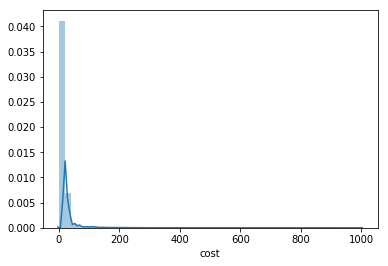

In [44]:
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

### A little bit about how logs work

In [46]:
np.log1p(42)

3.7612001156935624

In [48]:
np.expm1(3.7612001156935624)

42.0

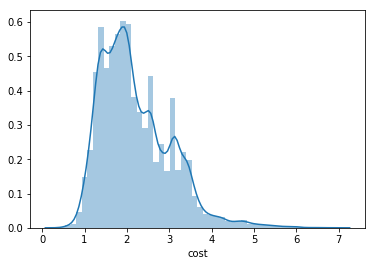

In [49]:
y_train_log = np.log1p(y_train)
sns.distplot(y_train_log);

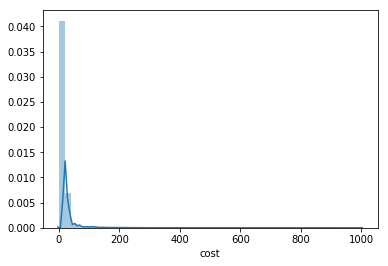

In [50]:
y_train_log_exp = np.expm1(y_train_log)
sns.distplot(y_train_log_exp);

In [0]:
all(np.isclose(y_train_log_exp, y_train))

### Refit the model with log-transformed target

In [52]:
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_val)
y_pred = np.expm1(y_pred_log)
rmsle(y_val, y_pred)

0.622925465880199

In [0]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [54]:
y_val_log = np.log1p(y_val)
rmse(y_val_log, y_pred_log)

0.622925465880199

In [55]:
!pip install category_encoders

     |████████████████████████████████| 92kB 5.3MB/s 


In [56]:
train.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
8,TA-00004,S-0066,2013-07-07,0,0,Yes,1,21.972702
9,TA-00004,S-0066,2013-07-07,0,0,Yes,2,12.407983
10,TA-00004,S-0066,2013-07-07,0,0,Yes,5,6.668596
11,TA-00004,S-0066,2013-07-07,0,0,Yes,10,4.754539
12,TA-00004,S-0066,2013-07-07,0,0,Yes,25,3.608331


In [0]:
def wrangle(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_year'] = X['quote_date'].dt.year
    X['quote_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    X = X.drop(columns ='tube_assembly_id')
    
    return X

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

In [63]:
features = train_wrangled.columns.drop(target)
print('Features:', features.tolist())

Features: ['supplier', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'quote_year', 'quote_month']


In [64]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val)
rmse(y_val_log, y_pred_log)

0.3950096664322286

In [65]:
y_pred = np.expm1(y_pred_log)
rmsle(y_val, y_pred)

0.3950096664322286

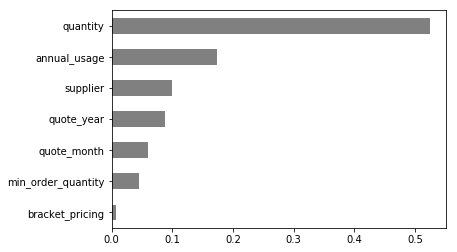

In [66]:
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)
importances.sort_values().plot.barh(color='grey');

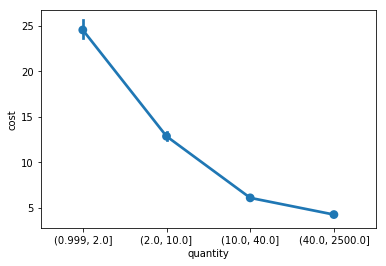

In [67]:
quantity_quartiles = pd.qcut(train_wrangled['quantity'], q=4)
sns.pointplot(x=quantity_quartiles, y=train_wrangled['cost']);

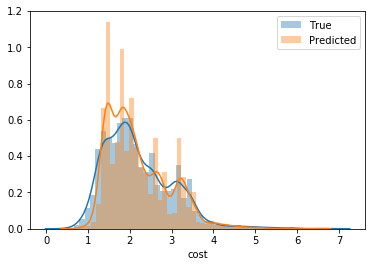

In [68]:
import matplotlib.pyplot as plt
sns.distplot(y_val_log, label='True')
sns.distplot(y_pred_log, label='Predicted')
plt.legend();

In [69]:
for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    shared_columns = set(df.columns) & set(train.columns)
    if shared_columns:
        print(path, df.shape)
        print(df.columns.tolist(), '\n')

competition_data/bill_of_materials.csv (21198, 17)
['tube_assembly_id', 'component_id_1', 'quantity_1', 'component_id_2', 'quantity_2', 'component_id_3', 'quantity_3', 'component_id_4', 'quantity_4', 'component_id_5', 'quantity_5', 'component_id_6', 'quantity_6', 'component_id_7', 'quantity_7', 'component_id_8', 'quantity_8'] 

competition_data/test_set.csv (30235, 8)
['id', 'tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity'] 

competition_data/tube.csv (21198, 16)
['tube_assembly_id', 'material_id', 'diameter', 'wall', 'length', 'num_bends', 'bend_radius', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end_a', 'end_x', 'num_boss', 'num_bracket', 'other'] 

competition_data/train_set.csv (30213, 8)
['tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'cost'] 

competition_data/specs.csv (21198, 11)
['tube_assembly_id', 'spec1', 'spec2', 'spec3', 'spec4', 'spec

In [0]:
specs = pd.read_csv('competition_data/specs.csv')

In [74]:
specs.head()

,tube_assembly_id,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10
0,TA-00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
specs.describe()

,tube_assembly_id,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10
count,21198,7129,6844,5840,4154,2921,2071,535,106,20,1
unique,21198,45,51,49,38,37,24,13,4,3,1
top,TA-19836,SP-0007,SP-0012,SP-0080,SP-0026,SP-0080,SP-0082,SP-0082,SP-0082,SP-0088,SP-0080
freq,1,3002,1736,1798,1492,1780,1167,322,73,18,1


In [75]:
specs.isnull().sum()

tube_assembly_id        0
spec1               14069
spec2               14354
spec3               15358
spec4               17044
spec5               18277
spec6               19127
spec7               20663
spec8               21092
spec9               21178
spec10              21197
dtype: int64

In [0]:
def wrangle(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_year'] = X['quote_date'].dt.year
    X['quote_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    # merge specs data
#     specs = pd.read_csv('competition_data/specs.csv')
#     bill_of_materials = pd.read_csv('competition_data/bill_of_materials.csv')
    tube = pd.read_csv('competition_data/tube.csv')
#     X = X.merge(specs, how='left')
    X = X.merge(tube, how='left')
#     X = X.merge(bill_of_materials, how='left')
    
    # drop tube_assembly_id because we are attempting to predict unknown assemblies
    X = X.drop(columns ='tube_assembly_id')
    
    return X

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

In [100]:
bill_of_materials = pd.read_csv('competition_data/bill_of_materials.csv')
bill_of_materials.describe()

,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,quantity_8
count,19149.000000,14786.000000,4798.000000,608.000000,92.000000,26.000000,7.0,1.0
mean,1.559873,1.526106,1.020634,1.027961,1.032609,1.153846,1.0,1.0
std,0.507444,0.510851,0.160100,0.209041,0.178583,0.367946,0.0,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
50%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
75%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
max,6.000000,6.000000,4.000000,4.000000,2.000000,2.000000,1.0,1.0


In [87]:
train_wrangled.shape, val_wrangled.shape

((22628, 18), (7585, 18))

In [97]:
train_wrangled.head(10)

,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,quote_year,quote_month,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,S-0066,0,0,Yes,1,21.972702,2013,7,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S-0066,0,0,Yes,2,12.407983,2013,7,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S-0066,0,0,Yes,5,6.668596,2013,7,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S-0066,0,0,Yes,10,4.754539,2013,7,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S-0066,0,0,Yes,25,3.608331,2013,7,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,S-0066,0,0,Yes,50,3.291176,2013,7,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,S-0066,0,0,Yes,100,3.149291,2013,7,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,S-0066,0,0,Yes,250,3.065829,2013,7,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,S-0066,0,0,Yes,1,28.374220,2013,9,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,S-0066,0,0,Yes,2,16.514303,2013,9,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
# adding specs to tube+df only makes the prediction worse

X_train = train_wrangled.drop(columns=target)
X_val = val_wrangled.drop(columns=target)

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val)
rmse(y_val_log, y_pred_log)

0.3071425826783341

In [112]:
test_wrangled = wrangle(test)
X_test =test_wrangled.drop(columns = 'id')
all(X_test.columns == X_train.columns)

True

In [0]:
y_pred_log = pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['cost'] = y_pred
submission.to_csv('submission-01', index=False)